# Pre-processing

## Setup

In [60]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


# Saves a figure to a file
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join("./figs", fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Pre-formatting

In [61]:
unprocessed_df = pd.read_csv(r"welddb\welddb.data", header=None)
unprocessed_df = unprocessed_df[0].str.split(r'\s+', expand=True).rename(columns=lambda i: f"col_{i+1}")

# Dictionnary to rename the columns in a meaningful way
columns_name_dict = {
    "col_1": "carbon_concentration_weight",
    "col_2": "silicon_concentration_weight",
    "col_3": "manganese_concentration_weight",
    "col_4": "sulphur_concentration_weight",
    "col_5": "phosphorus_concentration_weight",
    "col_6": "nickel_concentration_weight",
    "col_7": "chromium_concentration_weight",
    "col_8": "molybdenum_concentration_weight",
    "col_9": "vanadium_concentration_weight",
    "col_10": "copper_concentration_weight",
    "col_11": "cobalt_concentration_weight",
    "col_12": "tungsten_concentration_weight",
    "col_13": "oxygen_concentration_ppm",
    "col_14": "titanium_concentration_ppm",
    "col_15": "nitrogen_concentration_ppm",
    "col_16": "aluminium_concentration_ppm",
    "col_17": "boron_concentration_ppm",
    "col_18": "niobium_concentration_ppm",
    "col_19": "tin_concentration_ppm",
    "col_20": "arsenic_concentration_ppm",
    "col_21": "antimony_concentration_ppm",
    "col_22": "current_a",
    "col_23": "voltage_v",
    "col_24": "ac_or_dc",
    "col_25": "electrode_polarity",
    "col_26": "heat_input_kjmm1",
    "col_27": "interpass_temperature_c",
    "col_28": "weld_type",
    "col_29": "post_weld_heat_treatment_temperature_c",
    "col_30": "post_weld_heat_treatment_time_h",
    "col_31": "yield_strength_mpa",
    "col_32": "ultimate_tensile_strength_mpa",
    "col_33": "elongation_percent",
    "col_34": "reduction_of_area_percent",
    "col_35": "charpy_temperature_c",
    "col_36": "charpy_impact_toughness_j",
    "col_37": "hardness_kgmm2",
    "col_38": "fifty_percent_fatt",
    "col_39": "primary_ferrite_percent",
    "col_40": "ferrite_with_second_phase_percent",
    "col_41": "acicular_ferrite_percent",
    "col_42": "martensite_percent",
    "col_43": "ferrite_with_carbide_aggregate_percent",
    "col_44": "weld_id"
}

unprocessed_df = unprocessed_df.rename(columns=columns_name_dict)
# quick overview
print("Shape (rows, cols):", unprocessed_df.shape)
display(unprocessed_df.head())

unprocessed_df.info()
unprocessed_df.describe()


Shape (rows, cols): (1652, 45)


,carbon_concentration_weight,silicon_concentration_weight,manganese_concentration_weight,sulphur_concentration_weight,phosphorus_concentration_weight,nickel_concentration_weight,chromium_concentration_weight,molybdenum_concentration_weight,vanadium_concentration_weight,copper_concentration_weight,...,charpy_impact_toughness_j,hardness_kgmm2,fifty_percent_fatt,primary_ferrite_percent,ferrite_with_second_phase_percent,acicular_ferrite_percent,martensite_percent,ferrite_with_carbide_aggregate_percent,weld_id,col_45
0,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aaw,None
1,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aawch,None
2,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aht,None
3,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Baw,None
4,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,100,N,N,32,28,40,0,0,Evans-Ni/CMn-1990/1991-0Bawch,None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   carbon_concentration_weight             1652 non-null   object
 1   silicon_concentration_weight            1652 non-null   object
 2   manganese_concentration_weight          1652 non-null   object
 3   sulphur_concentration_weight            1652 non-null   object
 4   phosphorus_concentration_weight         1652 non-null   object
 5   nickel_concentration_weight             1652 non-null   object
 6   chromium_concentration_weight           1652 non-null   object
 7   molybdenum_concentration_weight         1652 non-null   object
 8   vanadium_concentration_weight           1652 non-null   object
 9   copper_concentration_weight             1652 non-null   object
 10  cobalt_concentration_weight             1652 non-null   object
 11  tung

,carbon_concentration_weight,silicon_concentration_weight,manganese_concentration_weight,sulphur_concentration_weight,phosphorus_concentration_weight,nickel_concentration_weight,chromium_concentration_weight,molybdenum_concentration_weight,vanadium_concentration_weight,copper_concentration_weight,...,charpy_impact_toughness_j,hardness_kgmm2,fifty_percent_fatt,primary_ferrite_percent,ferrite_with_second_phase_percent,acicular_ferrite_percent,martensite_percent,ferrite_with_carbide_aggregate_percent,weld_id,col_45
count,1652,1652,1652,1652,1652,1652,1652,1652,1652,1652,...,1652,1652,1652,1652,1652,1652,1652,1652,1652,1
unique,89,70,153,37,38,108,138,86,83,78,...,168,97,21,39,47,51,3,9,1490,1
top,0.076,0.33,1.36,0.007,0.008,N,N,N,N,N,...,N,N,N,N,N,N,N,N,Pat-1981-S6/BX400,
freq,86,135,65,403,214,955,868,859,724,1074,...,773,1514,1621,1554,1562,1562,1563,1563,5,1


In [62]:
processed_df = unprocessed_df.copy()

# drop non-informative columns : weld_id and col_45 (all missing values)
processed_df.drop('weld_id', axis=1, inplace=True)
processed_df.drop('col_45', axis=1, inplace=True)

# normalize missing-value markers and convert to numeric where possible
processed_df.replace('N', None, inplace=True)
processed_df = processed_df.apply(lambda col: pd.to_numeric(col, errors='ignore') )
display(processed_df.describe())
display(processed_df.info()) #OUTPUT: only numeric columns now

,carbon_concentration_weight,silicon_concentration_weight,manganese_concentration_weight,phosphorus_concentration_weight,nickel_concentration_weight,chromium_concentration_weight,oxygen_concentration_ppm,current_a,voltage_v,heat_input_kjmm1,...,ultimate_tensile_strength_mpa,elongation_percent,reduction_of_area_percent,charpy_temperature_c,charpy_impact_toughness_j,fifty_percent_fatt,ferrite_with_second_phase_percent,acicular_ferrite_percent,martensite_percent,ferrite_with_carbide_aggregate_percent
count,1652.000000,1652.000000,1652.000000,1642.000000,697.000000,784.000000,1256.000000,1404.000000,1404.000000,1652.000000,...,738.000000,700.000000,705.000000,879.000000,879.00000,31.000000,90.000000,90.000000,89.000000,89.000000
mean,0.075521,0.328577,1.202821,0.012952,0.415034,2.101273,441.967357,283.843661,27.607379,1.700987,...,594.386314,26.275714,71.799858,-34.606371,87.68942,-31.096774,25.955556,52.833333,0.337079,0.438202
std,0.023898,0.112455,0.382137,0.019627,0.786951,3.026548,147.483825,192.560955,12.555629,1.298465,...,88.636238,4.895986,8.926551,34.738624,50.11670,43.644285,21.283486,23.483798,3.179994,1.397685
min,0.029000,0.040000,0.270000,0.002000,0.000000,0.000000,132.000000,115.000000,11.500000,0.600000,...,447.000000,10.600000,17.000000,-114.000000,3.00000,-126.000000,3.000000,0.000000,0.000000,0.000000
25%,0.061750,0.270000,0.940000,0.007000,0.000000,0.000000,370.000000,170.000000,21.000000,1.000000,...,532.775000,22.800000,68.000000,-60.000000,38.00000,-62.000000,9.000000,35.500000,0.000000,0.000000
50%,0.074000,0.320000,1.270000,0.010000,0.067000,0.530000,423.000000,170.000000,21.000000,1.000000,...,575.500000,26.800000,75.000000,-40.000000,100.00000,-15.000000,18.000000,60.000000,0.000000,0.000000
75%,0.086000,0.360000,1.440000,0.014000,0.260000,2.300000,471.000000,300.000000,30.000000,2.000000,...,647.000000,30.000000,78.000000,-17.500000,100.00000,5.000000,38.000000,71.750000,0.000000,0.000000
max,0.180000,1.140000,2.250000,0.250000,3.500000,10.200000,1650.000000,900.000000,75.360000,7.900000,...,1151.000000,37.000000,83.000000,188.000000,270.00000,30.000000,100.000000,88.000000,30.000000,8.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   carbon_concentration_weight             1652 non-null   float64
 1   silicon_concentration_weight            1652 non-null   float64
 2   manganese_concentration_weight          1652 non-null   float64
 3   sulphur_concentration_weight            1648 non-null   object 
 4   phosphorus_concentration_weight         1642 non-null   float64
 5   nickel_concentration_weight             697 non-null    float64
 6   chromium_concentration_weight           784 non-null    float64
 7   molybdenum_concentration_weight         793 non-null    object 
 8   vanadium_concentration_weight           928 non-null    object 
 9   copper_concentration_weight             578 non-null    object 
 10  cobalt_concentration_weight             129 non-null    obje

None

In [67]:
def safe_numeric_conversion(df: pd.DataFrame) -> pd.DataFrame:
    """
    Try to convert each column to numeric.
    If the conversion fails (because of non-numeric values),
    the original column is preserved.
    """
    converted_df = df.copy()
    for col in converted_df.columns:
        try:
            # Try to convert entire column to numeric (handles None automatically)
            converted_col = pd.to_numeric(converted_df[col], errors='raise')
            converted_df[col] = converted_col
            print(f"✅ Converted '{col}' to numeric.")
        except Exception:
            print(f"⚠️  Kept '{col}' as non-numeric (contains non-convertible values).")
    return converted_df

processed_df_converted = safe_numeric_conversion(processed_df)

# Display summary of resulting dtypes
print("\n=== Conversion Summary ===")
display(processed_df_converted.dtypes.value_counts())

✅ Converted 'carbon_concentration_weight' to numeric.
✅ Converted 'silicon_concentration_weight' to numeric.
✅ Converted 'manganese_concentration_weight' to numeric.
⚠️  Kept 'sulphur_concentration_weight' as non-numeric (contains non-convertible values).
✅ Converted 'phosphorus_concentration_weight' to numeric.
✅ Converted 'nickel_concentration_weight' to numeric.
✅ Converted 'chromium_concentration_weight' to numeric.
⚠️  Kept 'molybdenum_concentration_weight' as non-numeric (contains non-convertible values).
⚠️  Kept 'vanadium_concentration_weight' as non-numeric (contains non-convertible values).
⚠️  Kept 'copper_concentration_weight' as non-numeric (contains non-convertible values).
⚠️  Kept 'cobalt_concentration_weight' as non-numeric (contains non-convertible values).
⚠️  Kept 'tungsten_concentration_weight' as non-numeric (contains non-convertible values).
✅ Converted 'oxygen_concentration_ppm' to numeric.
⚠️  Kept 'titanium_concentration_ppm' as non-numeric (contains non-conve

float64    23
object     20
dtype: int64

In [ ]:

# Check the data-types : explore object columns and check why some columns are not numeric
object_cols = processed_df.select_dtypes(include=['object']).columns
for col in object_cols:
    uniques = processed_df[col].unique()
    # replace actual None with a readable string for display
    uniques_display = [(None if (isinstance(x, float) and np.isnan(x)) else x) for x in uniques]
    print(f"{col} ({len(pd.unique(processed_df[col].dropna()))} valeurs uniques sans None):")
    print(uniques_display)
    print("-" * 80)

# ----- Conclusion -----
# Some non-numeric columns contains the symbol "<" preventing conversion to numeric.
# We will handle them as follows :
# - For columns where "<value" and value = minimum value observed, we will replace "<value" by minimum value / 2
# - For columns where "<value" and value != minimum value observed, we will replace "<value" by value - small epsilon

# Three non-numeric columns are relevant as object or string columns : ac_or_dc, electrode_polarity, weld_type.
# We will keep them as is.

# Other non-numeric columns contains mostly numeric values with some string values like 158(Hv30) [hardness_kgmm2] or 66totndrest [nitrogen_concentration_ppm].
# 

#

sulphur_concentration_weight (36 valeurs uniques sans None):
['0.008', '0.007', '0.006', '0.009', '0.005', '0.004', '0.010', '0.013', '0.011', '0.002', '0.003', '0.016', '0.015', '0.014', '0.012', '0.027', '0.024', '0.025', '0.036', '0.017', '0.021', '0.023', '0.022', '0.020', '0.018', '0.026', '0.028', '0.032', '0.029', '0.030', '0.019', '0.02', '<0.002', '0.001', None, '0.01', '0.14']
--------------------------------------------------------------------------------
molybdenum_concentration_weight (85 valeurs uniques sans None):
[None, '1.00', '1.01', '1.04', '1.03', '0.34', '0.35', '0.98', '0.96', '0.99', '0.91', '0.84', '0.97', '0.01', '0.32', '0.51', '0.54', '0.23', '0.24', '0.27', '0.26', '0.28', '0.29', '0.31', '0.37', '0', '0.02', '0.008', '0.5', '0.03', '0.43', '0.44', '0.48', '<0.01', '0.04', '0.003', '0.005', '0.009', '0.011', '0.17', '0.15', '0.12', '0.125', '0.145', '0.14', '0.185', '0.110', '0.188', '0.006', '0.30', '0.025', '0.010', '0.18', '0.22', '0.39', '0.022', '0.016'

## Diagnostic

### Missing Values and Unique Values

In [64]:
# Missing and Unique Values Diagnostics

# Column data types
dtypes_df = pd.DataFrame(processed_df.dtypes, columns=['dtype'])

# Missing values
missing_counts = processed_df.isna().sum()
missing_pct = (missing_counts / len(processed_df) * 100).round(2)
missing_df = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_pct': missing_pct
})

# Unique values per column
unique_counts = processed_df.nunique(dropna=False)
unique_df = pd.DataFrame(unique_counts, columns=['unique_values'])

# Display diagnostics
print("=== Column Data Types ===")
display(dtypes_df)

print("=== Missing Values ===")
display(missing_df)

print("=== Unique Values per Column ===")
display(unique_df)

# Rows with missing values and duplicates
print(f"Rows with any missing values: {processed_df.isna().any(axis=1).sum()}")
print(f"Duplicate rows: {processed_df.duplicated().sum()}")

###### Summary Statistics for Numeric Columns ######
print("=== Summary Statistics (Numeric Columns) ===")
display(processed_df.describe().T)

# ---------- Conclusion from diagnostics ----------
# Deleting the irrelevant columns : number of missing values > 50% and the number of unique values = 1

=== Column Data Types ===


,dtype
carbon_concentration_weight,float64
silicon_concentration_weight,float64
manganese_concentration_weight,float64
sulphur_concentration_weight,object
phosphorus_concentration_weight,float64
nickel_concentration_weight,float64
chromium_concentration_weight,float64
molybdenum_concentration_weight,object
vanadium_concentration_weight,object
copper_concentration_weight,object


=== Missing Values ===


,missing_count,missing_pct
carbon_concentration_weight,0,0.00
silicon_concentration_weight,0,0.00
manganese_concentration_weight,0,0.00
sulphur_concentration_weight,4,0.24
phosphorus_concentration_weight,10,0.61
nickel_concentration_weight,955,57.81
chromium_concentration_weight,868,52.54
molybdenum_concentration_weight,859,52.00
vanadium_concentration_weight,724,43.83
copper_concentration_weight,1074,65.01


=== Unique Values per Column ===


,unique_values
carbon_concentration_weight,81
silicon_concentration_weight,68
manganese_concentration_weight,147
sulphur_concentration_weight,37
phosphorus_concentration_weight,36
nickel_concentration_weight,102
chromium_concentration_weight,123
molybdenum_concentration_weight,86
vanadium_concentration_weight,83
copper_concentration_weight,78


Rows with any missing values: 1652
Duplicate rows: 4
=== Summary Statistics (Numeric Columns) ===


,count,mean,std,min,25%,50%,75%,max
carbon_concentration_weight,1652.0,0.075521,0.023898,0.029,0.06175,0.074,0.086,0.18
silicon_concentration_weight,1652.0,0.328577,0.112455,0.040,0.27000,0.320,0.360,1.14
manganese_concentration_weight,1652.0,1.202821,0.382137,0.270,0.94000,1.270,1.440,2.25
phosphorus_concentration_weight,1642.0,0.012952,0.019627,0.002,0.00700,0.010,0.014,0.25
nickel_concentration_weight,697.0,0.415034,0.786951,0.000,0.00000,0.067,0.260,3.50
chromium_concentration_weight,784.0,2.101273,3.026548,0.000,0.00000,0.530,2.300,10.20
oxygen_concentration_ppm,1256.0,441.967357,147.483825,132.000,370.00000,423.000,471.000,1650.00
current_a,1404.0,283.843661,192.560955,115.000,170.00000,170.000,300.000,900.00
voltage_v,1404.0,27.607379,12.555629,11.500,21.00000,21.000,30.000,75.36
heat_input_kjmm1,1652.0,1.700987,1.298465,0.600,1.00000,1.000,2.000,7.90


In [65]:
# Deleting the irrelevant columns : all values are missing and the number of unique values = 1
cols_to_drop = missing_df[(missing_df['missing_pct'] == 100) | (unique_df['unique_values'] == 1)].index
processed_df.drop(columns=cols_to_drop, inplace=True)


Column dtypes:
carbon_concentration_weight               float64
silicon_concentration_weight              float64
manganese_concentration_weight            float64
sulphur_concentration_weight               object
phosphorus_concentration_weight           float64
nickel_concentration_weight               float64
chromium_concentration_weight             float64
molybdenum_concentration_weight            object
vanadium_concentration_weight              object
copper_concentration_weight                object
cobalt_concentration_weight                object
tungsten_concentration_weight              object
oxygen_concentration_ppm                  float64
titanium_concentration_ppm                 object
nitrogen_concentration_ppm                 object
aluminium_concentration_ppm                object
boron_concentration_ppm                    object
niobium_concentration_ppm                  object
tin_concentration_ppm                      object
arsenic_concentration_ppm         

,count,mean,std,min,25%,50%,75%,max
carbon_concentration_weight,1652.0,0.075521,0.023898,0.029,0.06175,0.074,0.086,0.18
silicon_concentration_weight,1652.0,0.328577,0.112455,0.040,0.27000,0.320,0.360,1.14
manganese_concentration_weight,1652.0,1.202821,0.382137,0.270,0.94000,1.270,1.440,2.25
phosphorus_concentration_weight,1642.0,0.012952,0.019627,0.002,0.00700,0.010,0.014,0.25
nickel_concentration_weight,697.0,0.415034,0.786951,0.000,0.00000,0.067,0.260,3.50
chromium_concentration_weight,784.0,2.101273,3.026548,0.000,0.00000,0.530,2.300,10.20
oxygen_concentration_ppm,1256.0,441.967357,147.483825,132.000,370.00000,423.000,471.000,1650.00
current_a,1404.0,283.843661,192.560955,115.000,170.00000,170.000,300.000,900.00
voltage_v,1404.0,27.607379,12.555629,11.500,21.00000,21.000,30.000,75.36
heat_input_kjmm1,1652.0,1.700987,1.298465,0.600,1.00000,1.000,2.000,7.90



Correlation matrix (top-left corner):


,carbon_concentration_weight,silicon_concentration_weight,manganese_concentration_weight,phosphorus_concentration_weight,nickel_concentration_weight,chromium_concentration_weight,oxygen_concentration_ppm,current_a
carbon_concentration_weight,1.000000,-0.092881,0.062385,-0.010600,-0.323841,0.165217,-0.267335,0.362749
silicon_concentration_weight,-0.092881,1.000000,0.196200,-0.042756,-0.076714,-0.126585,-0.035420,-0.122273
manganese_concentration_weight,0.062385,0.196200,1.000000,0.038426,-0.004777,-0.237804,-0.221798,0.019413
phosphorus_concentration_weight,-0.010600,-0.042756,0.038426,1.000000,-0.058496,-0.043130,0.039493,0.146332
nickel_concentration_weight,-0.323841,-0.076714,-0.004777,-0.058496,1.000000,0.000844,-0.155482,-0.319666
chromium_concentration_weight,0.165217,-0.126585,-0.237804,-0.043130,0.000844,1.000000,0.130076,-0.516371
oxygen_concentration_ppm,-0.267335,-0.035420,-0.221798,0.039493,-0.155482,0.130076,1.000000,-0.114269
current_a,0.362749,-0.122273,0.019413,0.146332,-0.319666,-0.516371,-0.114269,1.000000


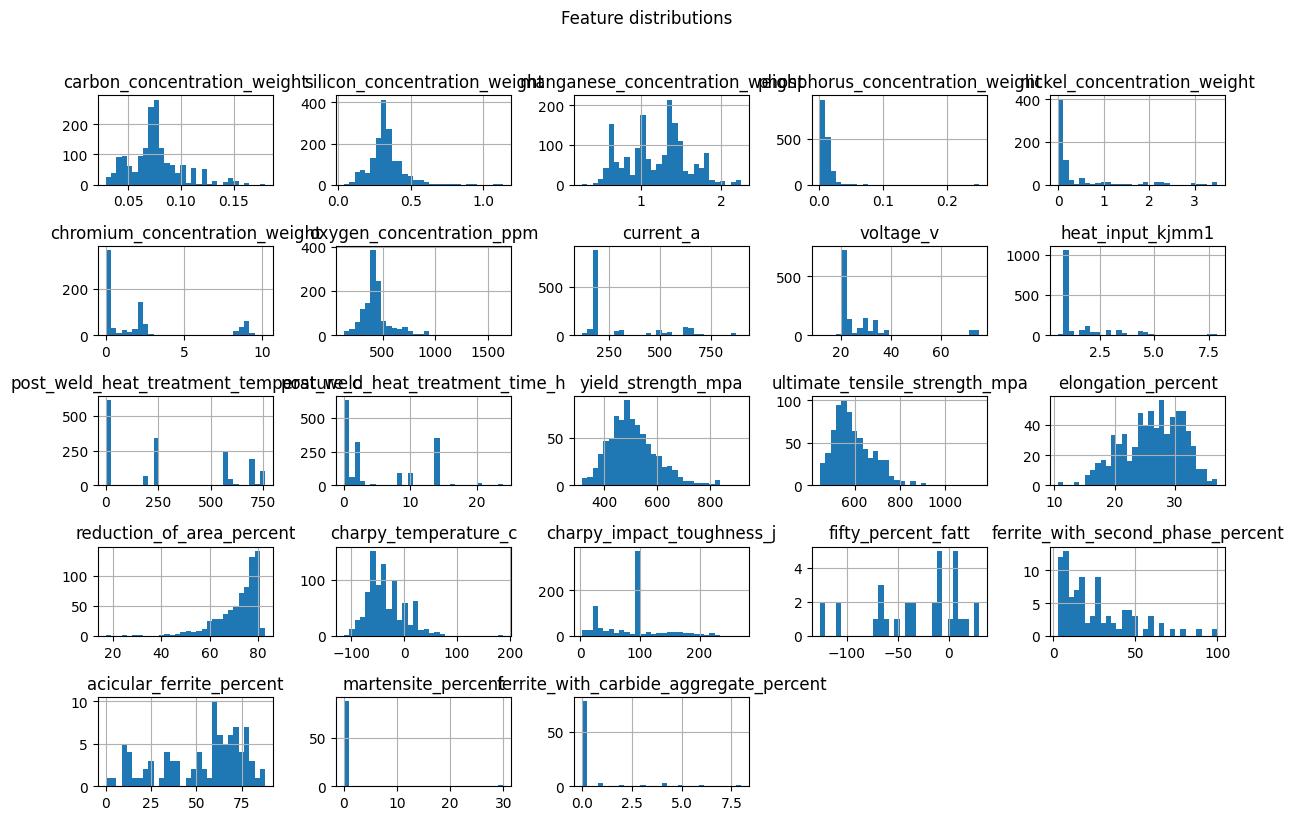

In [66]:

# diagnostics
dtypes = processed_df.dtypes
missing_counts = processed_df.isna().sum()
missing_pct = (missing_counts / len(processed_df) * 100).round(2)
unique_counts = processed_df.nunique(dropna=False)

print("\nColumn dtypes:")
print(dtypes)
print("\nMissing values (count):")
print(missing_counts)
print("\nMissing values (%):")
print(missing_pct)
print("\nUnique values per column:")
print(unique_counts)

print("\nRows with any missing values:", processed_df.isna().any(axis=1).sum())
print("Duplicate rows:", processed_df.duplicated().sum())

# summary statistics for numeric columns
display(processed_df.describe().T)

# simple visual checks
processed_df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature distributions", y=1.02)
plt.tight_layout()

# correlation overview (only numeric)
corr = processed_df.corr()
print("\nCorrelation matrix (top-left corner):")
display(corr.iloc[:8, :8])

## Pre-processing tasks

### Handling missing values